In [16]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



In [27]:
#Excercise 1 - Generated Quantities Block
gen_quant = CmdStanModel(stan_file='code_1.stan')


In [28]:
F = len('Rafal')
L = len('Skrzypek')
F,L

(5, 8)

In [29]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

19:10:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:10:35 - cmdstanpy - INFO - CmdStan done processing.


In [30]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,251.5100,257.0,230.0,274.0,242.0,276.0
1,0.0,0.0,73.4221,85.0,67.0,72.0,88.0,64.0
2,0.0,0.0,32.6777,34.0,44.0,30.0,32.0,31.0
3,0.0,0.0,76.4355,71.0,84.0,73.0,88.0,73.0
4,0.0,0.0,15.7517,16.0,14.0,10.0,19.0,15.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,173.7960,172.0,190.0,182.0,202.0,183.0
996,0.0,0.0,54.3063,54.0,49.0,61.0,55.0,51.0
997,0.0,0.0,160.3870,176.0,153.0,132.0,169.0,164.0
998,0.0,0.0,17.8619,15.0,14.0,22.0,16.0,14.0


<Axes: ylabel='Frequency'>

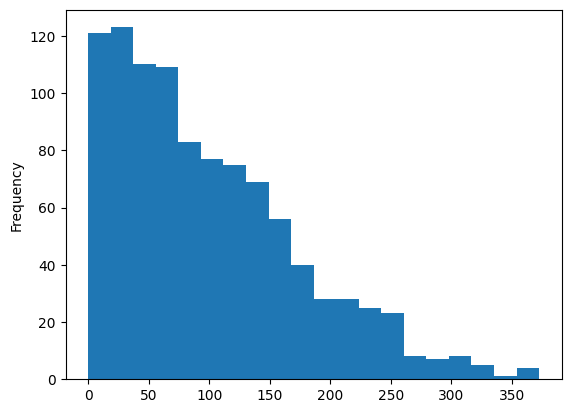

In [31]:
Lambda = df['lambda']
Lambda.plot.hist(bins = 20)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

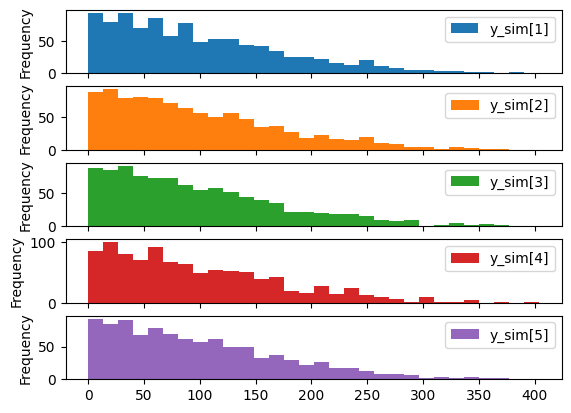

In [32]:
df2 = df.drop(df.columns[0:3], axis=1)
df2.plot.hist(subplots=True, bins=30)

In [34]:
#Excercise 2 - Constraints on the data
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

19:12:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                       | 00:00 Status
chain 2 |                                                                                                       | 00:00 Status

chain 3 |                                                                                                       | 00:00 Status


chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 3 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 4 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:12:10 - cmdstanpy - INFO - CmdStan done processing.


In [35]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

19:12:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                       | 00:00 Status
chain 2 |                                                                                                       | 00:00 Status

chain 3 |                                                                                                       | 00:00 Status


chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 3 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 4 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:12:23 - cmdstanpy - INFO - CmdStan done processing.


In [37]:
#Excercise 3 - Constraints on parameters
# Unconstrained parameters
model_gm1 = CmdStanModel(stan_file='code_4.stan')
#out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
#out_gamma1.diagnose()

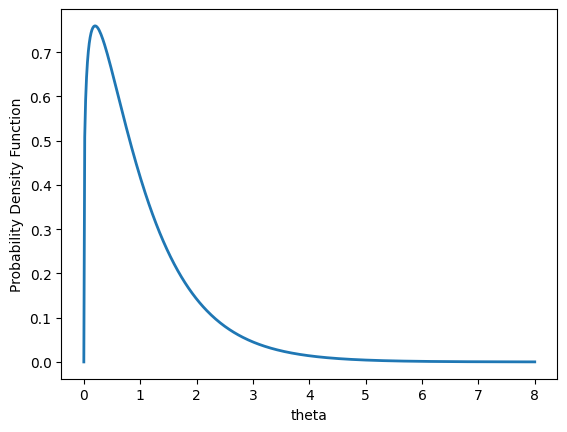

In [38]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [39]:
#Constrained parameter
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

19:13:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                       | 00:00 Status
chain 2 |                                                                                                       | 00:00 Status

chain 3 |                                                                                                       | 00:00 Status


chain 1 |███████████████████████████████████▉                                | 00:00 Iteration: 3500 / 7000 [ 50%]  (Sampling)
chain 2 |████████████████████████████████████████▌                           | 00:00 Iteration: 4000 / 7000 [ 57%]  (Sampling)

chain 3 |█████████████████████████████████████▊                              | 00:00 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |█████████████████████████████████████████


19:13:25 - cmdstanpy - INFO - CmdStan done processing.


19:13:25 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.0%)
	Use function "diagnose()" to see further information.


"Processing csv files: C:\\Users\\rafal\\Documents\\samples\\code_5-20230325191325_1.csv, C:\\Users\\rafal\\Documents\\samples\\code_5-20230325191325_2.csv, C:\\Users\\rafal\\Documents\\samples\\code_5-20230325191325_3.csv, C:\\Users\\rafal\\Documents\\samples\\code_5-20230325191325_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

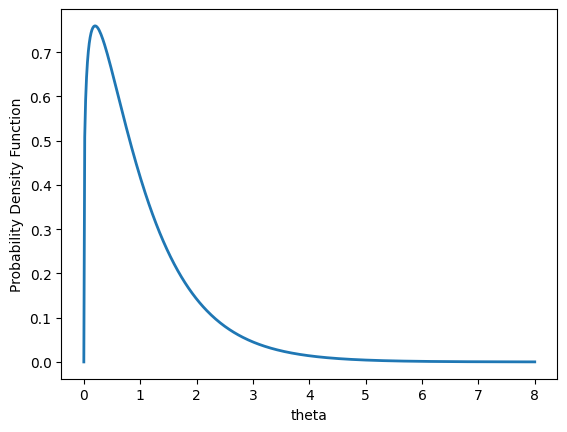

In [40]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [42]:
#Excercise 4 - Selection of parameters using equation solving
model_tune = CmdStanModel(stan_file='code_6.stan')

#F = # number of letters in the first name
#L = # number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

19:14:26 - cmdstanpy - INFO - CmdStan start processing
chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:14:26 - cmdstanpy - INFO - CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.52346


In [45]:
#Excercise 5 - different methods of defining models
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 17091999 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

19:16:43 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                       | 00:00 Status
chain 2 |                                                                                                       | 00:00 Status

chain 3 |                                                                                                       | 00:00 Status


chain 1 |██████████████████████████████████████████████████████████▋         | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 3 |█████████████████████████████████████████████████████████████▊      | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 4 |█████████████████████████████████████████████████████████████▊      | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |█████████████████████████████████████████


19:16:43 - cmdstanpy - INFO - CmdStan done processing.
19:16:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |                                                                                                       | 00:00 Status
chain 2 |                                                                                                       | 00:00 Status

chain 3 |                                                                                                       | 00:00 Status


chain 4 |                                                                                                       | 00:00 Status
chain 2 |██████████████████████████████████████████████████████████▋         | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████████████████████████████████████████████████████████▊      | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |███████████████████████████████████████████████████████████████████████████████████████████| 00:


19:16:43 - cmdstanpy - INFO - CmdStan done processing.
19:16:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |                                                                                                       | 00:00 Status
chain 2 |                                                                                                       | 00:00 Status

chain 3 |                                                                                                       | 00:00 Status


chain 1 |███████████████████████████████████████████▎                        | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 2 |████████████████████████████████████████████████████▌               | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 3 |████████████████████████████████████████████████████▌               | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |███████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |███████████████████████████████████████████████████████████████████████████████████████████| 00:


19:16:44 - cmdstanpy - INFO - CmdStan done processing.


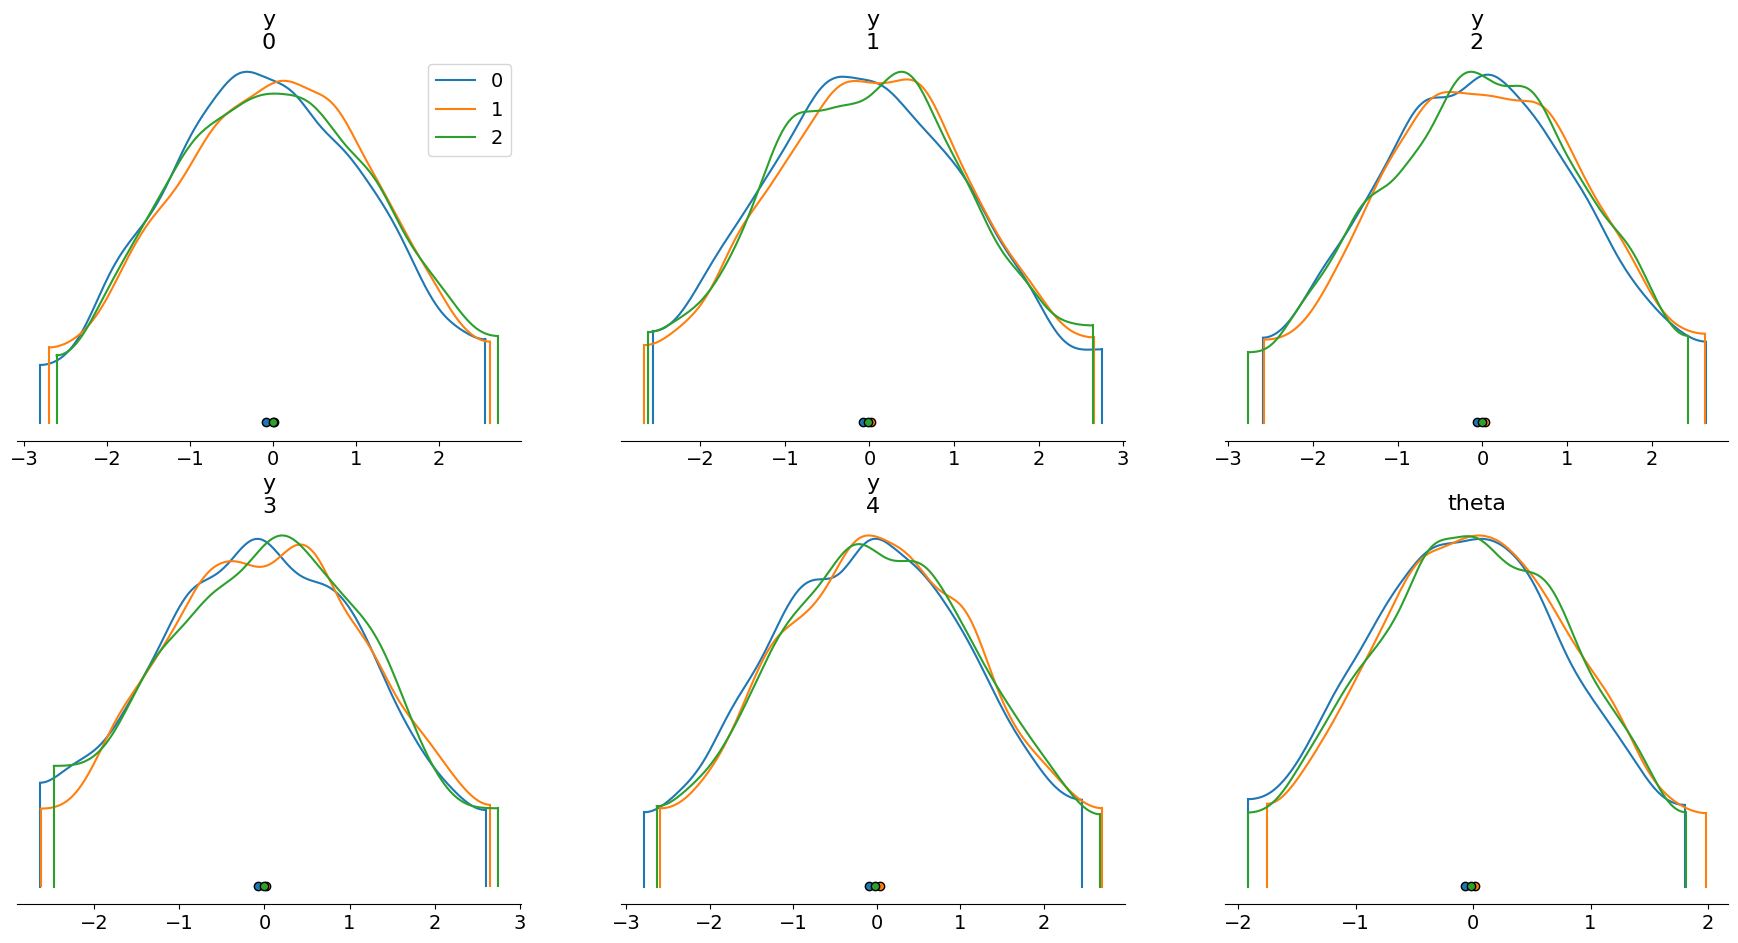

In [46]:
az.plot_density([result_1,result_2,result_3])
plt.show()

In [50]:
#Excercise 6 - generated quantities post sampling
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variable

19:18:16 - cmdstanpy - WARNING - Argument name `mcmc_sample` is deprecated, please rename to `previous_fit`.
19:18:16 - cmdstanpy - INFO - Chain [1] start processing
19:18:16 - cmdstanpy - INFO - Chain [2] start processing
19:18:16 - cmdstanpy - INFO - Chain [3] start processing
19:18:16 - cmdstanpy - INFO - Chain [4] start processing
19:18:16 - cmdstanpy - INFO - Chain [1] done processing
19:18:16 - cmdstanpy - INFO - Chain [4] done processing
19:18:16 - cmdstanpy - INFO - Chain [2] done processing
19:18:16 - cmdstanpy - INFO - Chain [3] done processing


(array([  1.,   2.,   5.,  17.,  34.,  62.,  97., 238., 361., 497., 562.,
        598., 503., 430., 277., 157.,  89.,  47.,  17.,   6.]),
 array([-4.4673   , -4.0668235, -3.666347 , -3.2658705, -2.865394 ,
        -2.4649175, -2.064441 , -1.6639645, -1.263488 , -0.8630115,
        -0.462535 , -0.0620585,  0.338418 ,  0.7388945,  1.139371 ,
         1.5398475,  1.940324 ,  2.3408005,  2.741277 ,  3.1417535,
         3.54223  ]),
 <BarContainer object of 20 artists>)

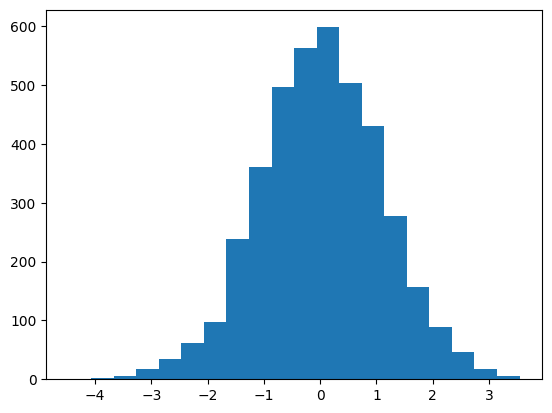

In [51]:
plt.hist(mean_of_y.mean_y, bins = 20)